In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv("listeners.csv")
df2 = pd.read_csv("./train.csv")



<ipython-input-3-6f77ad6ee76d>:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("./train.csv")


In [ ]:

# Set higher DPI for better resolution
plt.rcParams['figure.dpi'] = 150  # You can adjust the value (e.g., 150, 200, etc.)


### About the data

artists: The name(s) of the artist(s) associated with the track. (String)

album_name: The name of the album that the track belongs to. (String)

track_name: The name of the track. (String)

popularity: The popularity score of the track on Spotify, ranging from 0 to 100. (Integer)

duration_ms: The duration of the track in milliseconds. (Integer)

explicit: A boolean value indicating whether the track contains explicit content. (Boolean)

danceability: A score ranging from 0 to 1 that represents how suitable a track is for dancing based on various musical elements.(Float)

energy: A measure of the intensity and activity of a track, ranging from 0 to 1. (Float)

key: The key of the track represented by an integer value. (Integer)

loudness: The loudness of the track in decibels (dB). (Float)

mode: The tonal mode of the track, represented by an integer value (0 for minor, 1 for major). (Integer)

speechiness: A score ranging from 0 to 1 that represents the presence of spoken words in a track. (Float)

acousticness: A score ranging from 0 to 1 that represents the extent to which a track possesses an acoustic quality. (Float)

instrumentalness: A score ranging from 0 to 1 that represents the likelihood of a track being instrumental. (Float)

liveness: A score ranging from 0 to 1 that represents the presence of an audience during the recording or performance of atrack. (Float)

valence: A score ranging from 0 to 1 that represents the musical positiveness conveyed by a track. (Float)

tempo: The tempo of the track in beats per minute (BPM). (Float)

time_signature: The number of beats within each bar of the track. (Integer)

track_genre: The genre of the track. (String)


## Questions:

1. What genres of music do the most popular artists typically produce?
2. Is there a correlation between "danceability" and popularity?
3. Similarly, how does song duration correlate with popularity?
4. Print the most consistently listened to albums
5. Conversely, print albums with "one hit wonders", where only one or few songs are popular
6. Identify "one-hit wonders" by looking at songs whose popularity is very different from the artist's mean popularity

In [4]:
df2 = df2[df2["artists"].apply(lambda x: isinstance(x, str))]
df2["artists"] = df2["artists"].apply(lambda x: x.split(";"))

In [5]:
# Group rows by artist and explode the "artists" column
grouped_df = df2.explode("artists").groupby("artists")

# Find the top 5 most popular artists
top_artists = grouped_df.size().reset_index(name='count').sort_values(by="count", ascending=False).head(5)

# Get the genres produced by the top 5 artists
top_genres = {artist: grouped_df.get_group(artist)["track_genre"].value_counts() for artist in top_artists["artists"]}

# Print the genres for each top artist
for artist, genres in top_genres.items():
    print(f"{artist}:\n{genres}\n")

J Balvin:
track_genre
reggaeton     127
latino        126
reggae        113
latin         101
dance           8
electronic      8
edm             7
electro         7
pop             5
dancehall       3
funk            3
hip-hop         1
pagode          1
Name: count, dtype: int64

Bad Bunny:
track_genre
latino       121
reggaeton    114
reggae        90
latin         73
hip-hop       15
dance          2
salsa          1
Name: count, dtype: int64

Daddy Yankee:
track_genre
latino               87
reggaeton            80
reggae               72
latin                69
hip-hop              53
progressive-house     3
electro               3
dancehall             2
j-dance               2
hardcore              1
edm                   1
house                 1
pop                   1
Name: count, dtype: int64

Wolfgang Amadeus Mozart:
track_genre
classical    354
Name: count, dtype: int64

Feid:
track_genre
latino       79
reggaeton    75
reggae       71
latin        69
pop          54
Name

Question 3

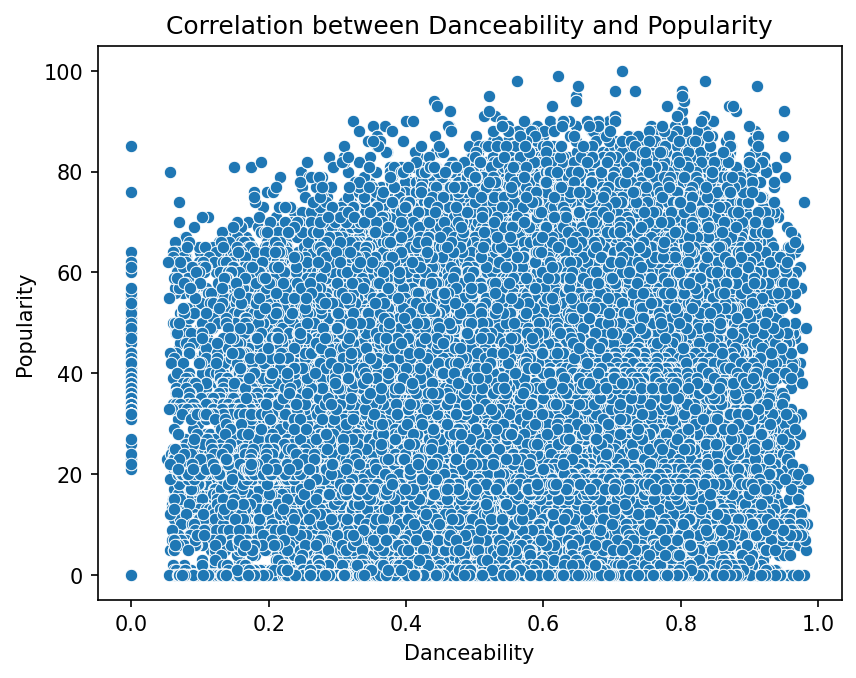

Correlation between danceability and popularity: 0.03544354596134703


In [ ]:
# Scatter plot to visualize the correlation
sns.scatterplot(data=df2, x="danceability", y="popularity")
plt.title("Correlation between Danceability and Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

# Calculate the correlation coefficient
correlation = df2["danceability"].corr(df2["popularity"])
print(f"Correlation between danceability and popularity: {correlation}")

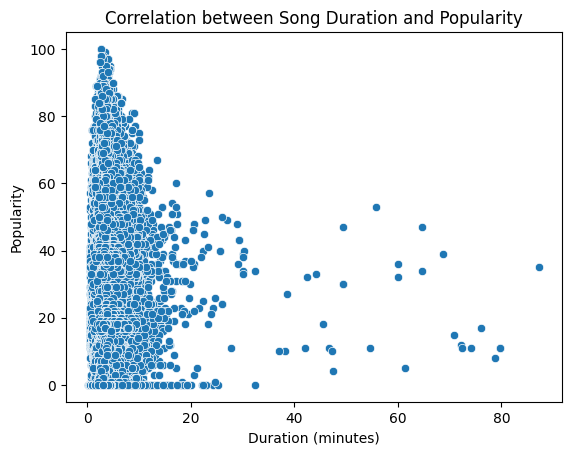

Correlation between song duration and popularity: -0.009734397222588152


In [6]:

# Convert duration from milliseconds to minutes for better readability
df2["duration_minutes"] = df2["duration_ms"] / 60000

# Scatter plot to visualize the correlation
sns.scatterplot(data=df2, x="duration_minutes", y="popularity")
plt.title("Correlation between Song Duration and Popularity")
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.show()

# Calculate the correlation coefficient
correlation = df2["duration_ms"].corr(df2["popularity"])
print(f"Correlation between song duration and popularity: {correlation}")

In [7]:
# Group by album and calculate the mean and standard deviation of popularity
album_stats = df2.groupby("album_name")["popularity"].agg(["mean", "std"]).reset_index()

# Sort by the lowest standard deviation (most consistent)
consistent_albums = album_stats.sort_values(by="std", ascending=False).head(5)
print("Most consistently listened-to albums:")
print(consistent_albums)

Most consistently listened-to albums:
          album_name  mean        std
14850  Glimpse of Us  58.0  50.911688
5824           Bones  59.0  42.426407
8173   Confrontation  42.5  41.719300
27613       Overdose  48.5  41.719300
23969     Millennium  51.5  41.719300


In [8]:


# Group rows by artist
grouped_df2 = df2.explode("artists").groupby("artists")
# Group by artist and calculate the mean popularity
artist_popularity = grouped_df2["popularity"].mean().reset_index()
artist_popularity.columns = ["artists", "mean_popularity"]

# Merge the mean popularity back into the original DataFrame
merged_df2 = df2.explode("artists").merge(artist_popularity, on="artists")

# Calculate the difference between song popularity and artist's mean popularity
merged_df2["popularity_diff"] = abs(merged_df2["popularity"] - merged_df2["mean_popularity"])

# Filter songs with a large difference (e.g., > 20)
one_hit_wonders = merged_df2[merged_df2["popularity_diff"] > 20]

print("One-hit wonders:")
print(one_hit_wonders[["track_name", "artists", "popularity", "mean_popularity", "popularity_diff"]].sort_values(by="popularity_diff", ascending=False))

One-hit wonders:
                                  track_name          artists  popularity  \
71483                        About Damn Time            Lizzo        89.0   
95164                                 LOKERA           Lyanno        91.0   
93890                                 LOKERA           Lyanno        91.0   
125237                                 Tarot           Jhayco        91.0   
94018                                  Tarot           Jhayco        91.0   
...                                      ...              ...         ...   
111854                   Ishq Samundar Remix  Sunidhi Chauhan        33.0   
49598                            Laaj Sharam    Jasleen Royal        33.0   
2371    Freguês da Meia Noite (Instrumental)           Criolo        15.0   
150964             Get Low (with Liam Payne)             Zedd        57.0   
116648                                Follow             Zedd        57.0   

        mean_popularity  popularity_diff  
71483          

In [9]:
#print(df2.tail(100))
# Count number of rows and sort in descending order
grouped_df2_count = grouped_df2.size().reset_index(name='count').sort_values(by="count", ascending=False)
# Count how many songs of different genres the top 5 artists have produced
top_5_artists = grouped_df2_count.head(5)["artists"]
top_5_genres = {artist: grouped_df2.get_group(artist)["track_genre"].value_counts() for artist in top_5_artists}
print(top_5_genres)
#the_weeknd_genres = grouped_df2.get_group("The Weeknd")["track_genre"].value_counts()

#sns.barplot(x=the_weeknd_genres.index, y=the_weeknd_genres.values)
#plt.xticks(rotation=45)

{'J Balvin': track_genre
reggaeton     127
latino        126
reggae        113
latin         101
dance           8
electronic      8
edm             7
electro         7
pop             5
dancehall       3
funk            3
hip-hop         1
pagode          1
Name: count, dtype: int64, 'Bad Bunny': track_genre
latino       121
reggaeton    114
reggae        90
latin         73
hip-hop       15
dance          2
salsa          1
Name: count, dtype: int64, 'Daddy Yankee': track_genre
latino               87
reggaeton            80
reggae               72
latin                69
hip-hop              53
progressive-house     3
electro               3
dancehall             2
j-dance               2
hardcore              1
edm                   1
house                 1
pop                   1
Name: count, dtype: int64, 'Wolfgang Amadeus Mozart': track_genre
classical    354
Name: count, dtype: int64, 'Feid': track_genre
latino       79
reggaeton    75
reggae       71
latin        69
pop      

In [10]:
#sns.barplot(data=cleaned)

# How does durability and danceability correlate?

<Axes: xlabel='duration_ms', ylabel='danceability'>

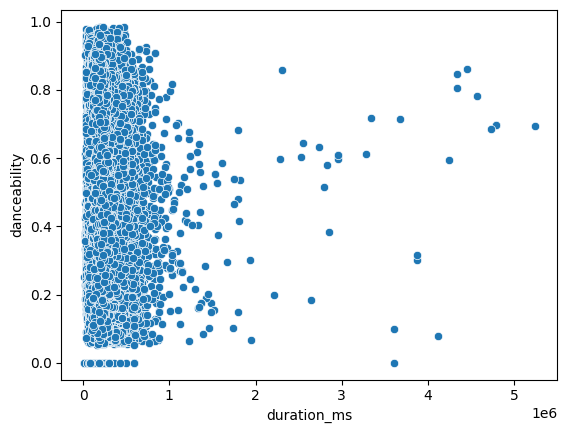

In [13]:
sns.scatterplot(data=df2, x="duration_ms", y="danceability")


**List of songs that are long and has high danceability**

In [24]:
# Convert duration from milliseconds to minutes
df2["duration_min"] = df2["duration_ms"] / 60000

# Sort by duration (longest first) and danceability (highest first)
sorted_df = df2.sort_values(by=["duration_min", "danceability"], ascending=[False, False])

# Select relevant columns, replacing 'duration_ms' with 'duration_min' and renaming
top_songs = sorted_df[["artists", "album_name", "track_name", "danceability", "duration_min"]].rename(columns={"duration_min": "duration (min)"})

# Display top results
print(top_songs.head())

#reverse_sorted_df = df2.sort_values(by=["duration_ms", "danceability"], ascending=[True, False])
#reverse_sorted_df.head()[["artists", "track_name", "danceability"]]




              artists                                         album_name  \
73617    [Tale Of Us]                                 Unity (Voyage Mix)   
10935     [Timo Maas]  Crossing Wires 002 - Compiled And Mixed By Tim...   
10984     [Timo Maas]  Crossing Wires 002 - Compiled And Mixed By Tim...   
24348  [Seth Troxler]                          Seth Troxler - The Lab 03   
73840     [Loco Dice]                     Amnesia Ibiza - Underground 10   

                                   track_name  danceability  duration (min)  
73617                Unity (Voyage Mix) Pt. 1         0.695       87.288250  
10935  Crossing Wires 002 - Continuous DJ Mix         0.697       79.817100  
10984  Crossing Wires 002 - Continuous DJ Mix         0.697       79.817100  
24348   The Lab 03 - Continuous DJ Mix Part 1         0.684       78.838367  
73840     Amnesia Ibiza Underground 10 DJ Mix         0.783       76.064950  


**Popoularity x energy**

<Axes: xlabel='popularity', ylabel='energy'>

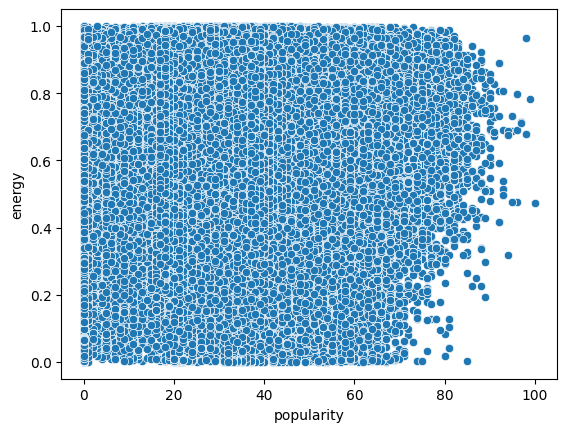

In [25]:
sns.scatterplot(data=df2, x="popularity", y="energy")


**Popular high energy**

In [28]:
# Sort by popularity first, then energy
sorted_df = df2.sort_values(by=["popularity", "energy"], ascending=[False, False])

# Select columns
top_songs = sorted_df[["artists", "album_name", "track_name", "energy", "popularity"]]

# Display top results
print(top_songs.head())


                          artists                             album_name  \
20001     [Sam Smith, Kim Petras]              Unholy (feat. Kim Petras)   
81051     [Sam Smith, Kim Petras]              Unholy (feat. Kim Petras)   
51664         [Bizarrap, Quevedo]  Quevedo: Bzrp Music Sessions, Vol. 52   
20008  [David Guetta, Bebe Rexha]                        I'm Good (Blue)   
30003  [David Guetta, Bebe Rexha]                        I'm Good (Blue)   

                                  track_name  energy  popularity  
20001              Unholy (feat. Kim Petras)   0.472       100.0  
81051              Unholy (feat. Kim Petras)   0.472       100.0  
51664  Quevedo: Bzrp Music Sessions, Vol. 52   0.782        99.0  
20008                        I'm Good (Blue)   0.965        98.0  
30003                        I'm Good (Blue)   0.965        98.0  


**Popularity of artists who produces most songs**

In [30]:
# Group rows by artist and explode the "artists" column
grouped_df = df2.explode("artists").groupby("artists")

# Find the top 5 most popular artists
top_artists = grouped_df.size().reset_index(name='count').sort_values(by="count", ascending=False).head(5)

print(top_artists)


                       artists  count
11443                 J Balvin    510
2514                 Bad Bunny    416
5906              Daddy Yankee    375
28185  Wolfgang Amadeus Mozart    354
8588                      Feid    348
